In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 
import seaborn as sns
import time
from sklearn.metrics import r2_score, mean_squared_error
import dask
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
drive.mount('/content/gdrive')
raw_data = pd.read_csv('gdrive/MyDrive/Data Mining SBU DS/immo_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Task 1: Data Cleaning

In [43]:
raw_data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [44]:
raw_data.drop_duplicates(inplace=True)

In [45]:
(raw_data.isnull().sum()/len(raw_data)*100).round(2)

regio1                       0.00
serviceCharge                2.57
heatingType                 16.68
telekomTvOffer              12.13
telekomHybridUploadSpeed    83.25
newlyConst                   0.00
balcony                      0.00
picturecount                 0.00
pricetrend                   0.68
telekomUploadSpeed          12.41
totalRent                   15.07
yearConstructed             21.22
scoutId                      0.00
noParkSpaces                65.39
firingTypes                 21.19
hasKitchen                   0.00
geo_bln                      0.00
cellar                       0.00
yearConstructedRange        21.22
baseRent                     0.00
houseNumber                 26.42
livingSpace                  0.00
geo_krs                      0.00
condition                   25.47
interiorQual                41.91
petsAllowed                 42.62
street                       0.00
streetPlain                 26.41
lift                         0.00
baseRentRange 

In [46]:
for col in raw_data.columns:
  if raw_data[col].isnull().sum()/len(raw_data)>0.15:
    raw_data.drop(columns={col}, axis=1, inplace=True)
(raw_data.isnull().sum()/len(raw_data)*100).round(2)

regio1                 0.00
serviceCharge          2.57
telekomTvOffer        12.13
newlyConst             0.00
balcony                0.00
picturecount           0.00
pricetrend             0.68
telekomUploadSpeed    12.41
scoutId                0.00
hasKitchen             0.00
geo_bln                0.00
cellar                 0.00
baseRent               0.00
livingSpace            0.00
geo_krs                0.00
street                 0.00
lift                   0.00
baseRentRange          0.00
typeOfFlat            13.62
geo_plz                0.00
noRooms                0.00
noRoomsRange           0.00
garden                 0.00
livingSpaceRange       0.00
regio2                 0.00
regio3                 0.00
description            7.34
date                   0.00
dtype: float64

In [47]:
raw_data["serviceCharge"].describe()

count    261941.000000
mean        151.206113
std         308.295790
min           0.000000
25%          95.000000
50%         135.000000
75%         190.000000
max      146118.000000
Name: serviceCharge, dtype: float64

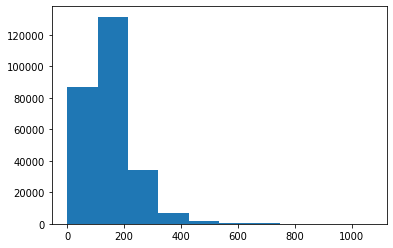

In [48]:
mean=raw_data["serviceCharge"].mean()
std=raw_data["serviceCharge"].std()
raw_data=raw_data[raw_data["serviceCharge"]<mean+3*std]
plt.hist(raw_data["serviceCharge"]);

In [49]:
raw_data["typeOfFlat"].isnull().sum()

35412

In [50]:
raw_data=raw_data[raw_data["typeOfFlat"].notna()]
raw_data.isnull().sum()

regio1                    0
serviceCharge             0
telekomTvOffer        27197
newlyConst                0
balcony                   0
picturecount              0
pricetrend             1617
telekomUploadSpeed    27832
scoutId                   0
hasKitchen                0
geo_bln                   0
cellar                    0
baseRent                  0
livingSpace               0
geo_krs                   0
street                    0
lift                      0
baseRentRange             0
typeOfFlat                0
geo_plz                   0
noRooms                   0
noRoomsRange              0
garden                    0
livingSpaceRange          0
regio2                    0
regio3                    0
description           14282
date                      0
dtype: int64

In [51]:
raw_data=raw_data[raw_data["telekomTvOffer"].notna()]
raw_data.isnull().sum()     

regio1                    0
serviceCharge             0
telekomTvOffer            0
newlyConst                0
balcony                   0
picturecount              0
pricetrend              621
telekomUploadSpeed      635
scoutId                   0
hasKitchen                0
geo_bln                   0
cellar                    0
baseRent                  0
livingSpace               0
geo_krs                   0
street                    0
lift                      0
baseRentRange             0
typeOfFlat                0
geo_plz                   0
noRooms                   0
noRoomsRange              0
garden                    0
livingSpaceRange          0
regio2                    0
regio3                    0
description           13001
date                      0
dtype: int64

In [52]:
raw_data.drop(columns={"description"}, inplace=True, axis=1)

In [53]:
raw_data["pricetrend"].interpolate(method='linear', limit_direction='forward', axis=0,inplace=True)

In [54]:
raw_data.isnull().sum()

regio1                  0
serviceCharge           0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed    635
scoutId                 0
hasKitchen              0
geo_bln                 0
cellar                  0
baseRent                0
livingSpace             0
geo_krs                 0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3                  0
date                    0
dtype: int64

In [55]:
raw_data["telekomUploadSpeed"].describe()

count    198601.00000
mean         28.92705
std          16.26003
min           1.00000
25%          10.00000
50%          40.00000
75%          40.00000
max         100.00000
Name: telekomUploadSpeed, dtype: float64

In [56]:
raw_data["telekomUploadSpeed"].interpolate(method='linear', limit_direction='forward', axis=0,inplace=True)

In [57]:
raw_data.isnull().sum()

regio1                0
serviceCharge         0
telekomTvOffer        0
newlyConst            0
balcony               0
picturecount          0
pricetrend            0
telekomUploadSpeed    0
scoutId               0
hasKitchen            0
geo_bln               0
cellar                0
baseRent              0
livingSpace           0
geo_krs               0
street                0
lift                  0
baseRentRange         0
typeOfFlat            0
geo_plz               0
noRooms               0
noRoomsRange          0
garden                0
livingSpaceRange      0
regio2                0
regio3                0
date                  0
dtype: int64

# Task 2: Descriptive Statisitcs and Visulizatio

In [58]:
x=raw_data["regio1"].value_counts(sort=False)

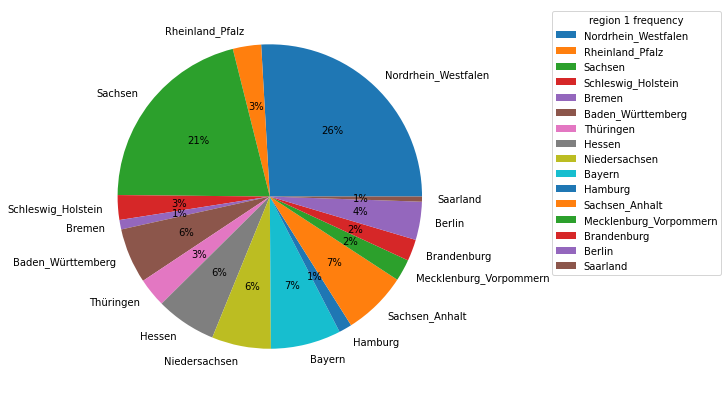

In [59]:
plt.figure(figsize=(10, 7))
plt.pie(x, labels=x.index, autopct='%.0f%%')
plt.legend(title="region 1 frequency",bbox_to_anchor=(1.7, 1));

In [60]:
raw_data.head()

,regio1,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,scoutId,hasKitchen,...,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
0,Nordrhein_Westfalen,245.00,ONE_YEAR_FREE,False,False,6,4.62,10.0,96107057,False,...,4,ground_floor,44269,4.0,4,True,4,Dortmund,Schüren,May19
1,Rheinland_Pfalz,134.00,ONE_YEAR_FREE,False,True,8,3.47,10.0,111378734,False,...,5,ground_floor,67459,3.0,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19
2,Sachsen,255.00,ONE_YEAR_FREE,True,True,8,2.72,2.4,113147523,False,...,6,apartment,1097,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19
3,Sachsen,58.15,ONE_YEAR_FREE,False,True,9,1.53,40.0,108890903,False,...,2,other,9599,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,May19
5,Schleswig_Holstein,142.00,NONE,False,True,5,4.48,2.4,115531145,True,...,2,apartment,24891,2.0,2,False,2,Schleswig_Flensburg_Kreis,Struxdorf,Feb20


In [61]:
serviceCharge_regio=raw_data[["regio1", "serviceCharge"]].groupby(raw_data["regio1"]).describe().round(2)
serviceCharge_regio

serviceCharge                                      \
                               count    mean     std  min     25%    50%   
regio1                                                                     
Baden_Württemberg            11683.0  170.42   90.91  0.0  110.00  160.0   
Bayern                       14870.0  171.52   89.62  0.0  110.00  160.0   
Berlin                        8081.0  194.09  125.25  0.0  111.00  164.0   
Brandenburg                   4567.0  132.99   73.59  0.0   80.00  120.0   
Bremen                        2005.0  159.95   74.32  0.0  104.00  150.0   
Hamburg                       2763.0  202.36  123.98  0.0  115.00  175.0   
Hessen                       12784.0  198.26   97.91  0.0  134.00  189.0   
Mecklenburg_Vorpommern        4606.0  118.80   61.50  0.0   73.61  110.0   
Niedersachsen                12510.0  143.21   68.49  0.0   95.00  130.0   
Nordrhein_Westfalen          51616.0  152.82   76.88  0.0  100.00  137.0   
Rheinland_Pfalz               5989.0  155.25   70.39  0.0  100.00  150.0   
Saarland                      1080.0  158.42   69.72  0.0  100.00  150.0   
Sachsen                      41704.0  132.70   69.46  0.0   87.21  121.0   
Sachsen_Anhalt               13613.0  112.91   57.56  0.0   70.00  100.0   
Schleswig_Holstein            5223.0  137.02   68.16  0.0   90.00  120.0   
Thüringen                     6142.0  124.39   61.51  0.0   80.00  120.0   

                                         
                           75%      max  
regio1                                   
Baden_Württemberg       220.00   830.00  
Bayern                  210.00   980.00  
Berlin                  236.00  1070.00  
Brandenburg             165.00   960.00  
Bremen                  200.00   670.00  
Hamburg                 250.00  1040.00  
Hessen                  250.00  1000.00  
Mecklenburg_Vorpommern  150.00   603.13  
Niedersachsen           180.00  1000.00  
Nordrhein_Westfalen     185.00  1050.00  
Rheinland_Pfalz         200.00   950.00  
Saarland                200.00   500.00  
Sachsen                 160.00  1009.56  
Sachsen_Anhalt          146.00   923.72  
Schleswig_Holstein      171.00   800.00  
Thüringen               150.17   992.25

In [62]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)


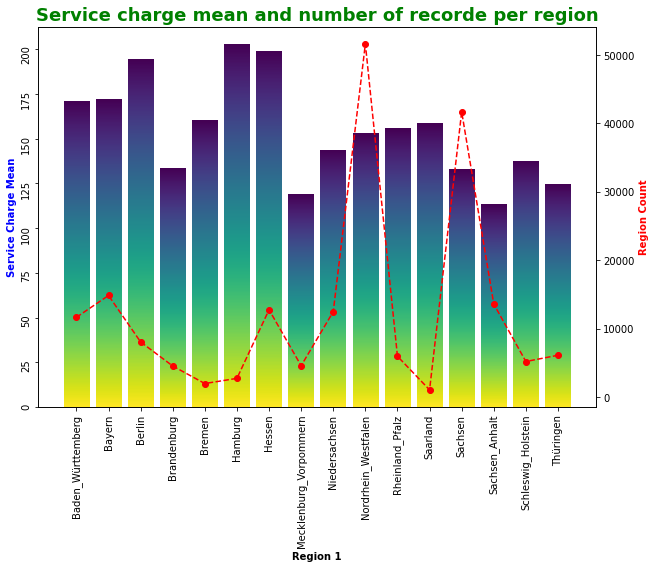

In [63]:
fig, ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()
plt1=ax1.bar(serviceCharge_regio.index, serviceCharge_regio["serviceCharge","mean"])
ax2.plot(serviceCharge_regio.index, serviceCharge_regio["serviceCharge","count"], c="r", marker="o", linestyle="dashed")

gradientbars(plt1);
ax1.tick_params(labelrotation=90);
ax1.set_xlabel("Region 1", weight="bold");
ax1.set_ylabel("Service Charge Mean", c="b",weight="bold");
ax2.set_ylabel("Region Count",c="r",weight="bold");
plt.title("Service charge mean and number of recorde per region", c="g", weight="bold", fontsize=18);


In [64]:
raw_data.dtypes

regio1                 object
serviceCharge         float64
telekomTvOffer         object
newlyConst               bool
balcony                  bool
picturecount            int64
pricetrend            float64
telekomUploadSpeed    float64
scoutId                 int64
hasKitchen               bool
geo_bln                object
cellar                   bool
baseRent              float64
livingSpace           float64
geo_krs                object
street                 object
lift                     bool
baseRentRange           int64
typeOfFlat             object
geo_plz                 int64
noRooms               float64
noRoomsRange            int64
garden                   bool
livingSpaceRange        int64
regio2                 object
regio3                 object
date                   object
dtype: object

In [65]:
x1=raw_data["telekomTvOffer"].value_counts()
x2=raw_data["typeOfFlat"].value_counts()
x3=raw_data["hasKitchen"].value_counts()
x4=raw_data["cellar"].value_counts()
x5=raw_data["lift"].value_counts()
x6=raw_data["garden"].value_counts()

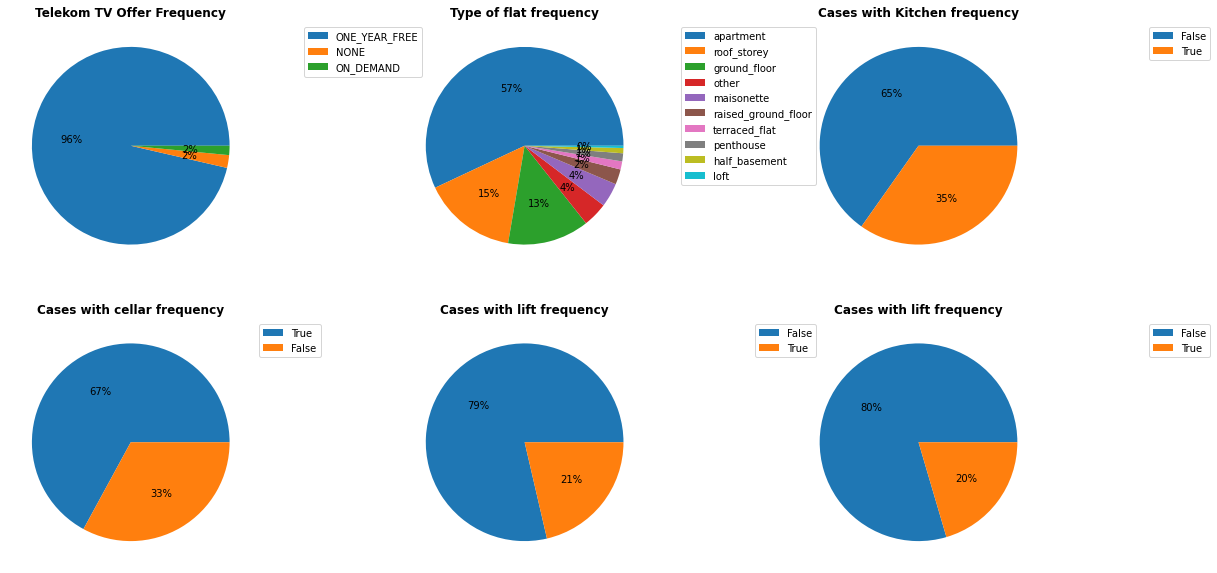

In [66]:
fig, ax=plt.subplots(2,3, figsize=(20,10))
# Telekom TV offer
ax[0,0].pie(x1, autopct='%.0f%%')
ax[0,0].set_title("Telekom TV Offer Frequency", weight="bold")
ax[0,0].legend(bbox_to_anchor=(1.7, 1),labels=x1.index);
# Type of flat
ax[0,1].pie(x2, autopct='%.0f%%')
ax[0,1].set_title("Type of flat frequency",weight="bold")
ax[0,1].legend(bbox_to_anchor=(1.7, 1),labels=x2.index);
# Has Kitchen
ax[0,2].pie(x3, autopct='%.0f%%')
ax[0,2].set_title("Cases with Kitchen frequency",weight="bold")
ax[0,2].legend(bbox_to_anchor=(1.7, 1),labels=x3.index);
# With Cellar
ax[1,0].pie(x4, autopct='%.0f%%')
ax[1,0].set_title("Cases with cellar frequency",weight="bold")
ax[1,0].legend(bbox_to_anchor=(1, 1),labels=x4.index);
# With lift
ax[1,1].pie(x5, autopct='%.0f%%')
ax[1,1].set_title("Cases with lift frequency",weight="bold")
ax[1,1].legend(bbox_to_anchor=(1.7, 1),labels=x5.index);
# With graden
ax[1,2].pie(x6, autopct='%.0f%%')
ax[1,2].set_title("Cases with lift frequency",weight="bold")
ax[1,2].legend(bbox_to_anchor=(1.7, 1),labels=x6.index);

In [67]:
regio_flatType=pd.crosstab(raw_data["regio1"], [raw_data["typeOfFlat"]])
regio_flatType

typeOfFlat,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat
regio1,,,,,,,,,,
Baden_Württemberg,5233,1724,220,83,874,745,377,287,1861,279
Bayern,7319,2101,151,108,709,871,370,297,2501,443
Berlin,5544,810,18,49,228,204,138,175,811,104
Brandenburg,2692,625,22,15,134,270,14,133,603,59
Bremen,1357,207,9,6,84,22,20,65,221,14
Hamburg,1668,302,18,11,133,93,89,78,313,58
Hessen,6447,1732,260,54,800,592,451,372,1817,259
Mecklenburg_Vorpommern,3031,495,14,3,111,246,9,59,597,41
Niedersachsen,6853,2030,108,30,435,371,183,292,2029,179


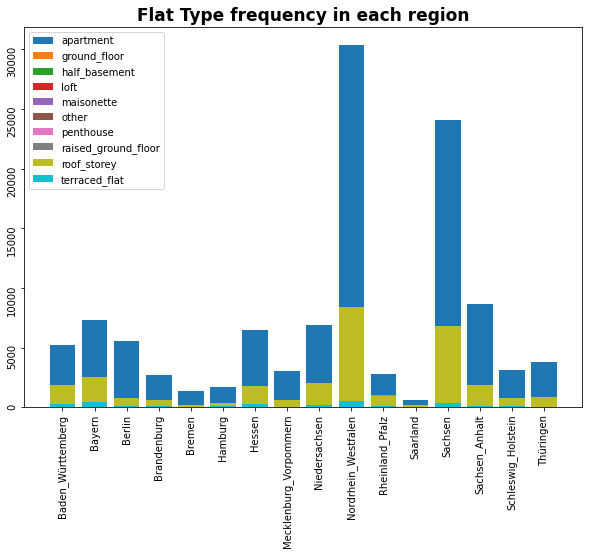

In [68]:
fig, ax=plt.subplots(figsize=(10,7))
for col in regio_flatType.columns:
  ax.bar(regio_flatType.index, regio_flatType[col], label=col)
ax.tick_params(labelrotation=90)
ax.set_title("Flat Type frequency in each region", weight="bold", fontsize=17)
plt.legend();

In [69]:
raw_data.dtypes

regio1                 object
serviceCharge         float64
telekomTvOffer         object
newlyConst               bool
balcony                  bool
picturecount            int64
pricetrend            float64
telekomUploadSpeed    float64
scoutId                 int64
hasKitchen               bool
geo_bln                object
cellar                   bool
baseRent              float64
livingSpace           float64
geo_krs                object
street                 object
lift                     bool
baseRentRange           int64
typeOfFlat             object
geo_plz                 int64
noRooms               float64
noRoomsRange            int64
garden                   bool
livingSpaceRange        int64
regio2                 object
regio3                 object
date                   object
dtype: object

# Task 3: Price Modeling Based on Other Features

In [70]:
reg_data=raw_data
reg_data.drop("street", axis=1, inplace=True)
boolean_feature=reg_data.select_dtypes(include=['bool']).columns
categorical_feature=reg_data.select_dtypes(include=['object']).columns
float_feature=reg_data.select_dtypes(include=['float64']).columns
int_feature=reg_data.select_dtypes(include=['int64']).columns

In [33]:
s_time=time.time()
for ct_ft in categorical_feature:
  reg_data =pd.concat([reg_data, pd.get_dummies(reg_data[ct_ft], prefix=ct_ft)], axis=1)
  reg_data.drop(ct_ft, axis=1, inplace=True)
pre_processing_time=time.time()-s_time

In [34]:
for bl_ft in boolean_feature:
  reg_data[bl_ft]=reg_data[bl_ft].astype(int)


In [35]:
# Importing Spliting library
from sklearn.model_selection import train_test_split

In [36]:
#Defining X and y
X=reg_data.drop("serviceCharge", axis=1)
y=reg_data["serviceCharge"]

In [37]:
#Spliting Data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [38]:
reg_data.dtypes

serviceCharge    float64
newlyConst         int64
balcony            int64
picturecount       int64
pricetrend       float64
                  ...   
regio3_Ürzig       uint8
date_Feb20         uint8
date_May19         uint8
date_Oct19         uint8
date_Sep18         uint8
Length: 8926, dtype: object

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_model= RandomForestRegressor()
reg_model.fit(X_train, y_train)
y_pred_rgm=reg_model.predict(X_test)
r2_score(y_pred_rgm, y_test)

# Bonus Task 1: Feature Engineering

In [98]:
reg_data_numerical=pd.DataFrame()
for ft in float_feature:
  reg_data_numerical[ft] =reg_data[ft]
for ft in int_feature:
  reg_data_numerical[ft] =reg_data[ft]

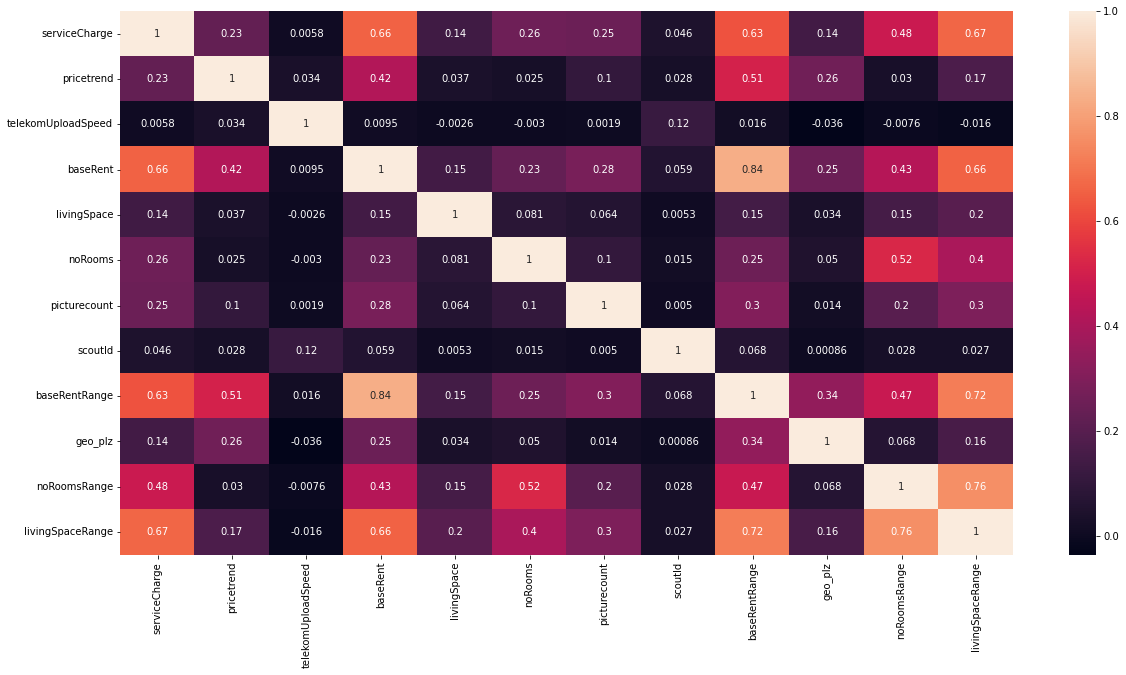

In [99]:
# Drawing corrolation matrix
corr_mat=reg_data_numerical.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [93]:
X=reg_data_numerical.drop("serviceCharge", axis=1)
y=reg_data_numerical["serviceCharge"]

In [94]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [79]:
reg_model_dist=RandomForestRegressor(max_depth=10, random_state=1)
reg_model_dist.fit(X_train, y_train)
y_pred_rgm_dist=reg_model_dist.predict(X_test)


NameError: ignored

In [83]:
mean_squared_error(y_test, y_pred_rgm_dist)

2725.6516653732424

In [100]:
reg_data_notcorrlated=reg_data_numerical.drop(columns={"livingSpaceRange"}, axis=1)

In [101]:
X=reg_data_notcorrlated.drop("serviceCharge", axis=1)
y=reg_data_notcorrlated["serviceCharge"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
reg_model_dist=RandomForestRegressor(max_depth=10, random_state=1)
reg_model_dist.fit(X_train, y_train)
y_pred_rgm_dist=reg_model_dist.predict(X_test)
mean_squared_error(y_test, y_pred_rgm_dist)

2848.921124108785